In [131]:
with open('../tulane_images/source/AbsolutePixelCoordinate.txt', 'r') as f:
    lines = f.readlines()

items = [x.strip().split(' ') for x in lines]

from ast import literal_eval

items = [(x[0].split('.')[0], literal_eval(x[1])) for x in items]
items.sort(key=lambda x: int(x[0]))
# items = items[:10]
items

[('20240320022313700', (0, 0)),
 ('20240320022313746', (77.3061, 4.57275)),
 ('20240320022313792', (216.699, 12.2439)),
 ('20240320022313838', (330.135, 20.202)),
 ('20240320022313883', (394.054, 24.3926)),
 ('20240320022313929', (462.174, 28.407)),
 ('20240320022313975', (547.83, 31.726)),
 ('20240320022314021', (665.233, 38.1343)),
 ('20240320022314069', (773.44, 44.4267)),
 ('20240320022314115', (897.807, 52.147)),
 ('20240320022314162', (971.229, 56.373)),
 ('20240320022314209', (1039.02, 60.6848)),
 ('20240320022314259', (1111.38, 63.7957)),
 ('20240320022314307', (1211.33, 70.6626)),
 ('20240320022314347', (1277.75, 74.4168)),
 ('20240320022314393', (1348.3, 78.1238)),
 ('20240320022314437', (1443.17, 83.9902)),
 ('20240320022314486', (1543.79, 90.5208)),
 ('20240320022314530', (1599.42, 94.0162)),
 ('20240320022314575', (1635.74, 96.9619)),
 ('20240320022314620', (1684.32, 99.388)),
 ('20240320022314669', (1756.18, 103.723)),
 ('20240320022314713', (1839.13, 109.265)),
 ('202403

In [132]:
import numpy as np

points = np.array([(p[0], -p[1]) for _, p in items])

min_xy = np.min(points, axis=0)
points = points - min_xy

min_xy, points

(array([   0.   , -199.029]),
 array([[0.0000000e+00, 1.9902900e+02],
        [7.7306100e+01, 1.9445625e+02],
        [2.1669900e+02, 1.8678510e+02],
        [3.3013500e+02, 1.7882700e+02],
        [3.9405400e+02, 1.7463640e+02],
        [4.6217400e+02, 1.7062200e+02],
        [5.4783000e+02, 1.6730300e+02],
        [6.6523300e+02, 1.6089470e+02],
        [7.7344000e+02, 1.5460230e+02],
        [8.9780700e+02, 1.4688200e+02],
        [9.7122900e+02, 1.4265600e+02],
        [1.0390200e+03, 1.3834420e+02],
        [1.1113800e+03, 1.3523330e+02],
        [1.2113300e+03, 1.2836640e+02],
        [1.2777500e+03, 1.2461220e+02],
        [1.3483000e+03, 1.2090520e+02],
        [1.4431700e+03, 1.1503880e+02],
        [1.5437900e+03, 1.0850820e+02],
        [1.5994200e+03, 1.0501280e+02],
        [1.6357400e+03, 1.0206710e+02],
        [1.6843200e+03, 9.9641000e+01],
        [1.7561800e+03, 9.5306000e+01],
        [1.8391300e+03, 8.9764000e+01],
        [1.9069700e+03, 8.5989000e+01],
        [1

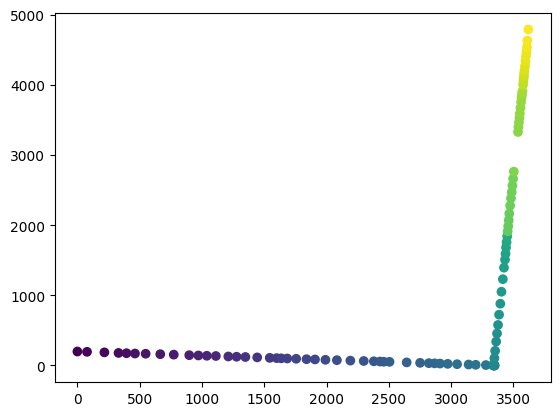

In [133]:
import matplotlib.pyplot as plt

# colors = np.zeros(len(points))                # zero
# colors = np.array(range(len(points)))         # order
colors = np.array([int(t) for t, _ in items]) # time

plt.scatter(points.T[0], points.T[1], c=colors)
plt.show()

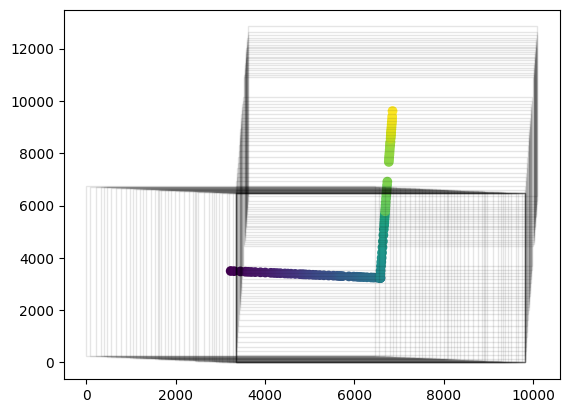

In [134]:
frame_size = [6464, 4852]

# rescale points based so frame size is "square", we will invert this change later
# this is needed to make the voronoi diagram respect the rectangular frame
aspect_ratio = frame_size[0]/frame_size[1] # 1
points[:,1] *= aspect_ratio
frame_size[1] *= aspect_ratio

top_right = points + frame_size

centroids = (points + top_right) / 2

fig, ax = plt.subplots()

# ax.scatter(points.T[0], points.T[1], c='b', alpha=0.2)
# ax.scatter(top_right.T[0], top_right.T[1], c='r', alpha=0.2)
ax.scatter(centroids.T[0], centroids.T[1], c=colors)

for p in points:
    ax.add_patch(plt.Rectangle(p, *frame_size, fill=None, alpha=0.1))

plt.show()

In [135]:
centroids.astype(int)

array([[3232, 3497],
       [3309, 3491],
       [3448, 3480],
       [3562, 3470],
       [3626, 3464],
       [3694, 3459],
       [3779, 3454],
       [3897, 3446],
       [4005, 3437],
       [4129, 3427],
       [4203, 3422],
       [4271, 3416],
       [4343, 3412],
       [4443, 3403],
       [4509, 3398],
       [4580, 3393],
       [4675, 3385],
       [4775, 3376],
       [4831, 3371],
       [4867, 3367],
       [4916, 3364],
       [4988, 3358],
       [5071, 3351],
       [5138, 3346],
       [5222, 3339],
       [5314, 3332],
       [5422, 3324],
       [5530, 3317],
       [5611, 3311],
       [5661, 3306],
       [5691, 3303],
       [5737, 3301],
       [5874, 3290],
       [5982, 3282],
       [6053, 3276],
       [6098, 3272],
       [6142, 3268],
       [6204, 3262],
       [6279, 3257],
       [6371, 3250],
       [6429, 3244],
       [6510, 3239],
       [6579, 3233],
       [6581, 3232],
       [6572, 3233],
       [6572, 3233],
       [6572, 3233],
       [6572,

In [136]:
# -- test code unused --
radius = 1000

# left point index
lpi = np.argmin(points, axis=0)[0]
left_point = points[lpi]

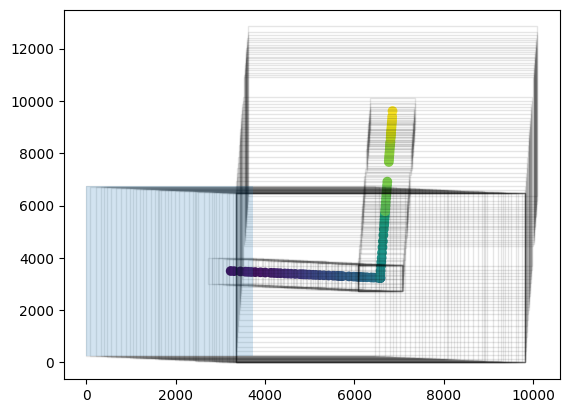

In [137]:
# -- test code unused --
fig, ax = plt.subplots()

ax.scatter(centroids.T[0], centroids.T[1], c=colors)

for p in points:
    ax.add_patch(plt.Rectangle(p, *frame_size, fill=None, alpha=0.1))

for p in centroids:
    ax.add_patch(plt.Rectangle(p - radius/2, radius, radius, fill=None, alpha=0.1))

left_bound = (frame_size[0]/2 + radius / 2, frame_size[1])
ax.add_patch(plt.Rectangle(left_point, *left_bound, fill='r', alpha=0.2))

plt.show()

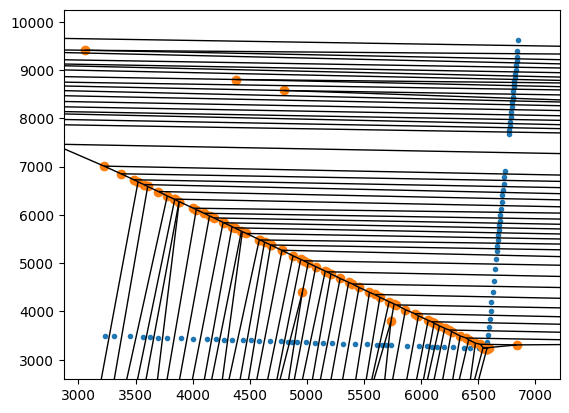

In [138]:
# -- test code unused --
from scipy.spatial import Voronoi, voronoi_plot_2d

vor = Voronoi(centroids)
voronoi_plot_2d(vor)
vor

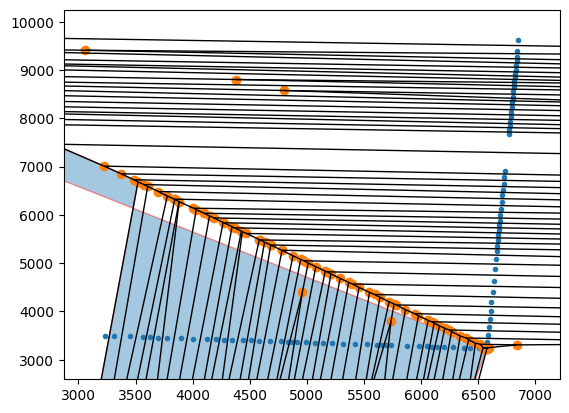

In [139]:
# -- test code unused --
from matplotlib.patches import Polygon

point_to_region = vor.point_region
reg = vor.regions[point_to_region[0]]
vor.vertices[reg]

fig = voronoi_plot_2d(vor)
ax = fig.gca()
ax.add_patch(Polygon(vor.vertices[reg], fill='r', edgecolor='r', alpha=0.4))
plt.show()


In [140]:
bl, tr = points.min(axis=0), points.max(axis=0) + frame_size
bl, tr

(array([0., 0.]), array([10083.02      , 12843.49505688]))

POLYGON ((10083.02 0, 10083.02 12843.49505688376, 0 12843.49505688376, 0 0, 10083.02 0))


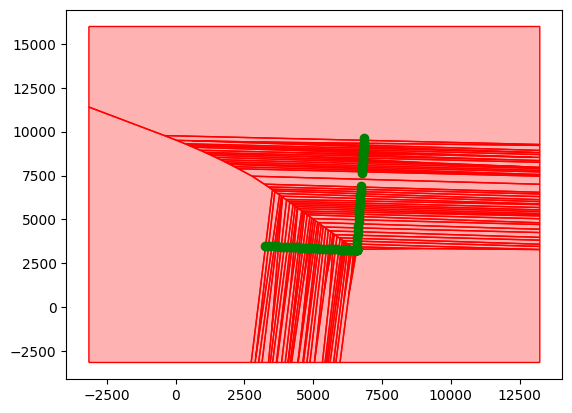

In [141]:
from shapely.ops import voronoi_diagram
from shapely.geometry import MultiPoint, box
from shapely.plotting import plot_polygon, plot_points

centroids_mp = MultiPoint(centroids)
envelope = box(*bl, *tr)
print(envelope)
regions = voronoi_diagram(centroids_mp, envelope=envelope)
list(regions.geoms)

fig = plt.figure(1)
ax = fig.add_subplot(111)

for region in regions.geoms:
    plot_polygon(region, ax=ax, add_points=False, color='r')

plot_points(centroids_mp, ax=ax, color='g')

plt.show()

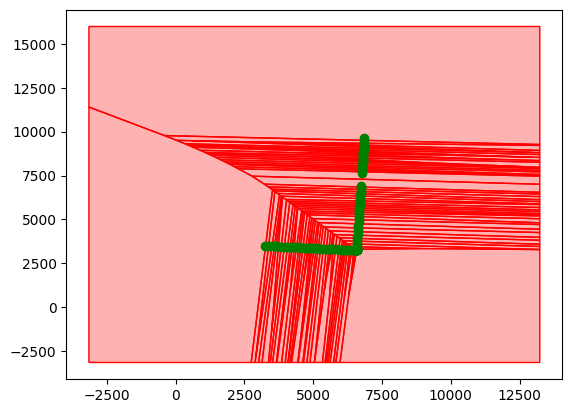

In [142]:
from IPython import display
from shapely.geometry import Point

polygons = list(regions.geoms)
# find the matching original centroid point for each polygon
orig_centroids = []
for p in polygons:
    for i, c in enumerate(centroids):
        if p.contains(Point(c)):
            orig_centroids.append(i)
            break

fig = plt.figure(1)
ax = fig.add_subplot(111)

for i, polygon in enumerate(polygons):
    plot_polygon(polygon, ax=ax, add_points=False, color='r')
    ax.plot(*centroids[orig_centroids[i]], 'go')
    display.display(fig)
    display.clear_output(wait=True)
    # if input() != '': break

In [143]:
import rasterio.features

out_shape = tr - bl
out_shape = (int(out_shape[0]), int(out_shape[1]/aspect_ratio)) # rescale back from square frame size
print(out_shape)

shapes = zip(polygons, orig_centroids)

img = rasterio.features.rasterize(shapes, out_shape=out_shape,
                                  transform=rasterio.Affine(1, 0, bl[0],
                                                            0, -aspect_ratio, tr[1]), # transform y axis per aspect ratio
                                  fill=255, all_touched=True)
img.shape

(10083, 9640)


(10083, 9640)

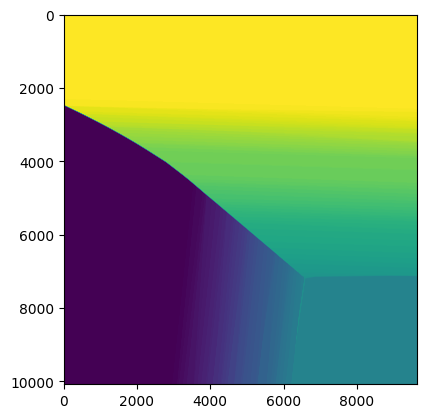

In [144]:
plt.imshow(img)

In [145]:
import large_image

out = large_image.new()
out.addTile(img, 0, 0)
out.write('../tulane_images/masked/voronoi_mask.tiff', lossy=False)

Cannot import GDAL.
/home/local/KHQ/will.dunklin/Desktop/work/pathcam-notebooks/venv/lib/python3.11/site-packages/large_image_source_zarr/__init__.py:85: FutureWarning: The SQLiteStore is deprecated and will be removed in a Zarr-Python version 3, see https://github.com/zarr-developers/zarr-python/issues/1274 for more information.
  self._zarr = zarr.open(zarr.SQLiteStore(self._largeImagePath), mode='r')
